<br>
<br>

# SECOND PART OF THE PROJECT

<br>

# Before modelling - analyze missing values in *test* dataset

We have to analyze the test dataset separately since we didn't do that in exploratory analysis. We will follow the same logic.

In [540]:
# Import all needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
%matplotlib inline

In [541]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [542]:
count_of_null_values = df_test.isna().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
percentage = percent * 100
percentage = percentage.apply(lambda x: "{:0.2f}{}".format(x,'%'))

missing_data2 = pd.concat([count_of_null_values, percentage], axis=1, keys=['Count of null-values occurrences', 'Percentage of null-values occurrences'])
missing_data2.head(34)

,Count of null-values occurrences,Percentage of null-values occurrences
PoolQC,1456,99.79%
MiscFeature,1408,96.50%
Alley,1352,92.67%
Fence,1169,80.12%
FireplaceQu,730,50.03%
LotFrontage,227,15.56%
GarageCond,78,5.35%
GarageQual,78,5.35%
GarageYrBlt,78,5.35%
GarageFinish,78,5.35%


In [543]:
df_test_x = df_test.copy()

##### <font color='blue'> PoolQC </font> <a id="poolqc">

In [544]:
# Number of rows which have null(NA) values in column 'PoolQC'
number_of_nulls = df_test[df_test['PoolQC'].isna()].shape[0]

# Number of rows which have zeros in column 'PoolArea'
number_of_zeros = df_test[df_test['PoolArea'] == 0].shape[0]

# Number of rows which have both 'NA' in 'PoolQC' and 0 in 'PoolArea'
zeros_and_nulls = df_test[(df_test['PoolQC'].isna()) & (df_test['PoolArea'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'PoolQC': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'PoolArea': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'PoolArea' and 'NA' in column 'PoolQC': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'PoolQC': 1456
Number of rows containing 0 in column 'PoolArea': 1453

Number of rows which have both zeros in column 'PoolArea' and 'NA' in column 'PoolQC': 1453


For those 1453 rows that contain both 0 for PoolArea and NaN for PoolQC, we will fill their null values with "NoPool".
There are other 3 rows with null values that have PoolArea > 0. Since we have only 3 rows with non-null PoolQC, we can't decide anything about relationship between PoolArea and PoolQC. But we notice that PoolArea for our 3 rows are big in comparison to those 3 existing pools, and other features don't stand out, so we will fill PoolQC with "Ex".

In [545]:
df_test_x.loc[(df_test_x['Id'] == 2421) | (df_test_x['Id'] == 2504) | (df_test_x['Id'] == 2600), 'PoolQC'] = 'Ex'
df_test_x['PoolQC'].fillna('NoPool', inplace=True)

##### <font color='blue'> MiscFeature </font> <a id="miscfeature">

In [546]:
# Number of rows which have null(NA) values in column 'MiscFeature'
number_of_nulls = df_test_x[df_test_x['MiscFeature'].isna()].shape[0]

# Number of rows which have zeros in column 'MiscVal'
number_of_zeros = df_test_x[df_test_x['MiscVal'] == 0].shape[0]

# Number of rows which have both 'NA' in 'MiscFeature' and 0 in 'MiscVal'
zeros_and_nulls = df_test_x[(df_test_x['MiscFeature'].isna()) & (df_test_x['MiscVal'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'MiscFeatures': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'MiscVal': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'MiscVal' and 'NA' in column 'MiscFeatures': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'MiscFeatures': 1408
Number of rows containing 0 in column 'MiscVal': 1408

Number of rows which have both zeros in column 'MiscVal' and 'NA' in column 'MiscFeatures': 1407


Those 1407 null values will be filled with "NoMiscFeature". For one row with MiscVal = 0 and MiscFeature = Shed, we will fill MiscFeature with average value of MiscFeature = "Shed". For one row with MiscFeature = NaN and MiscVal > 0, we can't conclude anything. It has very high value for MiscVal compared to others. We will drop this row. 

In [547]:
# Fill in average value of MiscVal where MiscFeature = Shed
means = df_test_x.groupby('MiscFeature')['MiscVal'].mean()
df_test_x.loc[(df_test_x['Id'] == 2432), 'MiscVal'] = means['Shed']

# Fill NaNs with "NoMiscFeature"
df_test_x['MiscFeature'].fillna('NoMiscFeature', inplace=True)

#####  <font color='blue'> Alley </font> <a id="alley">

Explanation as for train dataset. 

In [548]:
df_test_x['Alley'].fillna('NoAlley', inplace=True)

##### <font color='blue'> Fence </font> <a id="fence">

Explanation as for train dataset.

In [549]:
df_test_x['Fence'].fillna('NoFence', inplace=True)

##### <font color='blue'> FireplaceQu </font> <a id="fireplacequ">

In [550]:
# Number of rows which have null(NA) values in column 'FireplaceQu'
number_of_nulls = df_test_x[df_test_x['FireplaceQu'].isna()].shape[0]

# Number of rows which have zeros in column 'Fireplaces'
number_of_zeros = df_test_x[df_test_x['Fireplaces'] == 0].shape[0]

# Number of rows which have both 'NA' in 'FireplaceQu' and 0 in 'Fireplaces'
zeros_and_nulls = df_test_x[(df_test_x['FireplaceQu'].isna()) & (df_test_x['Fireplaces'] == 0)].shape[0]

print("Number of rows containing 'NA' in column 'FireplaceQu': {}" .format(number_of_nulls))
print("Number of rows containing 0 in column 'Fireplaces': {}" .format(number_of_zeros))
print("\nNumber of rows which have both zeros in column 'Fireplaces' and 'NA' in column 'FireplaceQu': {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'FireplaceQu': 730
Number of rows containing 0 in column 'Fireplaces': 730

Number of rows which have both zeros in column 'Fireplaces' and 'NA' in column 'FireplaceQu': 730


Explanation as for train dataset.

In [551]:
df_test_x['FireplaceQu'].fillna('NoFireplace', inplace=True)

##### <font color='blue'> LotFrontage </font> <a id="lotfrontage">

In [552]:
# Number of rows with 0 in column 'LotFrontage'
zeros = df_test_x[df_test_x['LotFrontage'] == 0].shape[0]
print("Number of rows that contain 0 in column 'LotFrontage': {}" .format(zeros))

Number of rows that contain 0 in column 'LotFrontage': 0


Explanation as for train dataset.

In [553]:
# Group by neighborhood and fill in missing value by the median of all LotFrontages in the neighborhood it belongs to   
df_test_x['LotFrontage'] = df_test_x.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

##### <font color='blue'> GarageCond, GarageType, GarageFinish, GarageQual, GarageYrBlt, GarageArea, GarageCars </font> <a id="garagex">

In [554]:
# Just a condition that we will use in the next line, it checks the null values of those 5 specific columns
all_nulls_condition = (df_test_x['GarageCond'].isna()) & (df_test_x['GarageType'].isna()) & (df_test_x['GarageFinish'].isna()) & (df_test_x['GarageQual'].isna()) & (df_test_x['GarageYrBlt'].isna())

# Just a condition that we will use in the next line, it checks the zeros in those 2 specific columns
all_zeros_condition = (df_test_x['GarageCars'] == 0) & (df_test_x['GarageArea'] == 0)

# Number of rows which have both 'NA' in 5 variables and 0 in 2 variables
zeros_and_nulls = df_test_x[all_nulls_condition & all_zeros_condition].shape[0]

print("\nNumber of rows which have all zeros and nulls in all 7 variables: {}" .format(zeros_and_nulls))


Number of rows which have all zeros and nulls in all 7 variables: 76


Those 76 rows will be filled with "NoGarage". Other two rows where some features have null values, and some don't, will be treated as "NoGarage" rows.

In [555]:
df_test_x['GarageCond'].fillna('NoGarage', inplace=True)
df_test_x['GarageType'].fillna('NoGarage', inplace=True)
df_test_x['GarageQual'].fillna('NoGarage', inplace=True)
df_test_x['GarageFinish'].fillna('NoGarage', inplace=True)
df_test_x['GarageYrBlt'].fillna(0, inplace=True)

# Two specific rows
df_test_x.loc[(df_test_x['Id'] == 2127) | (df_test_x['Id'] == 2577), 'GarageType'] = 'NoGarage'
df_test_x.loc[(df_test_x['Id'] == 2127) | (df_test_x['Id'] == 2577), 'GarageCars'] = 0
df_test_x.loc[(df_test_x['Id'] == 2127) | (df_test_x['Id'] == 2577), 'GarageArea'] = 0

##### <font color='blue'> BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, <br> BsmtHalfBath, BsmtFullBath, BsmtFinSF2, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF </font> <a id="bsmtx">

In [556]:
# Number of rows which have null(NA) values in those 5 specific columns (separately)
number_of_nulls1 = df_test_x[df_test_x['BsmtExposure'].isna()].shape[0]
number_of_nulls2 = df_test_x[df_test_x['BsmtFinType2'].isna()].shape[0]
number_of_nulls3 = df_test_x[df_test_x['BsmtFinType1'].isna()].shape[0]
number_of_nulls4 = df_test_x[df_test_x['BsmtCond'].isna()].shape[0]
number_of_nulls5 = df_test_x[df_test_x['BsmtQual'].isna()].shape[0]

print("Number of rows containing 'NA' in column 'BsmtExposure': {}" .format(number_of_nulls1))
print("Number of rows containing 'NA' in column 'BsmtFinType2': {}" .format(number_of_nulls2))
print("Number of rows containing 'NA' in column 'BsmtFinType1': {}" .format(number_of_nulls3))
print("Number of rows containing 'NA' in column 'BsmtCond': {}" .format(number_of_nulls4))
print("Number of rows containing 'NA' in column 'BsmtQual': {}" .format(number_of_nulls5))


# Number of zeros in TotalBsmtSF
number_of_zeros4 = df_test_x[df_test_x['TotalBsmtSF'] == 0].shape[0]
zero_condition = (df_test_x['TotalBsmtSF'] == 0)

print("\nNumber of rows containing 0 in column 'TotalBsmtSF': {}" .format(number_of_zeros4))


# Number of rows which have both 'NA' in 5 variables and 0 in 6 variables
zeros_and_nulls = df_test_x[all_nulls_condition & zero_condition].shape[0]

print("\nNumber of rows which have zeros for TotalBsmtSF and nulls in those 5 variables: {}" .format(zeros_and_nulls))

Number of rows containing 'NA' in column 'BsmtExposure': 44
Number of rows containing 'NA' in column 'BsmtFinType2': 42
Number of rows containing 'NA' in column 'BsmtFinType1': 42
Number of rows containing 'NA' in column 'BsmtCond': 45
Number of rows containing 'NA' in column 'BsmtQual': 44

Number of rows containing 0 in column 'TotalBsmtSF': 41

Number of rows which have zeros for TotalBsmtSF and nulls in those 5 variables: 7


Those 41 row from above will be treated as "NoBsmt". Let's see what to do with those few remaining null values.

In [557]:
df_test_x[['Id', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']][((df_test_x['BsmtExposure'].isna()) | (df_test_x['BsmtFinType2'].isna()) | (df_test_x['BsmtFinType1'].isna()) | (df_test_x['BsmtCond'].isna()) | (df_test_x['BsmtQual'].isna())) & (df_test_x['TotalBsmtSF'] > 0)]

,Id,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
27,1488,NaN,Unf,Unf,TA,Gd,0.0,0.0,0.0,0.0,1595.0,1595.0
580,2041,Mn,Rec,GLQ,NaN,Gd,0.0,1.0,382.0,1044.0,0.0,1426.0
725,2186,No,Unf,BLQ,NaN,TA,1.0,0.0,0.0,1033.0,94.0,1127.0
757,2218,No,Unf,Unf,Fa,NaN,0.0,0.0,0.0,0.0,173.0,173.0
758,2219,No,Unf,Unf,TA,NaN,0.0,0.0,0.0,0.0,356.0,356.0
888,2349,NaN,Unf,Unf,TA,Gd,0.0,0.0,0.0,0.0,725.0,725.0
1064,2525,Av,Unf,ALQ,NaN,TA,0.0,0.0,0.0,755.0,240.0,995.0


Id = 1488: Since basement is unfinished, probably BsmtExposure is not built (yet or ever will be). So we will fil "No". <br>
Id = 2041: Based on other Bsmt values, we expect basement is in good overall condition. <br>
Id = 2186: Based on other Bsmt values, we expect basement is in typical overall condition. <br>
Id = 2218: Based on other Bsmt values, we expect basement has fair BsmtQual. Features say it is a small place with fair condition, so probably cramped. <br>
Id = 2219: Based on other Bsmt values, we expect basement has typical BsmtQual. <br>
Id = 2349: Since basement is unfinished, probably BsmtExposure is not built (yet or ever will be). So we will fil "No". <br>
Id = 2525: Based on other Bsmt values, we expect basement is in good overall condition.

In [558]:
# Fix these few specific rows
df_test_x.loc[(df_test_x['Id'] == 1488) | (df_test_x['Id'] == 2349), 'BsmtExposure'] = 'No'
df_test_x.loc[(df_test_x['Id'] == 2041) | (df_test_x['Id'] == 2525), 'BsmtCond'] = 'Gd'
df_test_x.loc[(df_test_x['Id'] == 2186), 'BsmtCond'] = 'TA'
df_test_x.loc[(df_test_x['Id'] == 2218), 'BsmtQual'] = 'Fa'
df_test_x.loc[(df_test_x['Id'] == 2219), 'BsmtQual'] = 'TA'

# Fill new values for the rest of the *NA* values
df_test_x['BsmtExposure'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtFinType2'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtFinType1'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtCond'].fillna('NoBsmt', inplace=True)
df_test_x['BsmtQual'].fillna('NoBsmt', inplace=True)

In [559]:
df_test_x[['Id', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtHalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF']][((df_test_x['BsmtHalfBath'].isna()) | (df_test_x['BsmtFullBath'].isna()) | (df_test_x['BsmtFinSF2'].isna()) | (df_test_x['BsmtFinSF1'].isna()) | (df_test_x['TotalBsmtSF'].isna()) | (df_test_x['BsmtUnfSF'].isna()))]

,Id,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtHalfBath,BsmtFullBath,BsmtFinSF2,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF
660,2121,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NaN,NaN,NaN,NaN,NaN,NaN
728,2189,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NaN,NaN,0.0,0.0,0.0,0.0


We will fill missing values with zeros.

In [560]:
df_test_x['BsmtHalfBath'].fillna(0, inplace=True)
df_test_x['BsmtFullBath'].fillna(0, inplace=True)
df_test_x['BsmtFinSF2'].fillna(0, inplace=True)
df_test_x['BsmtFinSF1'].fillna(0, inplace=True)
df_test_x['BsmtUnfSF'].fillna(0, inplace=True)
df_test_x['TotalBsmtSF'].fillna(0, inplace=True)

##### <font color='blue'> MasVnrArea, MasVnrType </font> <a id="masvnrx">

In [561]:
# Number of rows that contain 'NA' for both columns 'MasVnrArea' and 'MasVnrType'
nulls = df_test_x[(df_test_x['MasVnrArea'].isna()) & (df_test_x['MasVnrType'].isna())].shape[0]

print("Number of rows containing 'NA' in both columns 'MasVnrArea' and 'MasVnrType': {}" .format(nulls))

Number of rows containing 'NA' in both columns 'MasVnrArea' and 'MasVnrType': 15


In [562]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['MasVnrArea'].notnull()) & (df_test_x['MasVnrType'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1150,2611,20,RL,124.0,27697,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,NoFireplace,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,11,2007,COD,Abnorml


Since everything is typical about this house, we will fill missing MasVnrType with most often MasVnrType.

In [563]:
df_test_x['MasVnrType'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,MasVnrType
0,None,878
1,BrkFace,434
2,Stone,121
3,BrkCmn,10


In [564]:
df_test_x.loc[(df_test_x['Id'] == 2611), 'MasVnrType'] = 'BrkFace'

# Filling with zeros and 'None'
df_test_x['MasVnrArea'].fillna(0, inplace=True)
df_test_x['MasVnrType'].fillna('None', inplace=True)

##### <font color='blue'> MSZoning </font> <a id="electrical">

Since MSZoning is location based feature, we will find most often values for MSZoning in belonging neighborhood.

In [565]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['MSZoning'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NoAlley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NoFireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NoAlley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NoFireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,2,2008,WD,Abnorml
790,2251,70,NaN,60.0,56600,Pave,NoAlley,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NoFireplace,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NoFireplace,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,5,2006,WD,Normal


In [566]:
df_test_x['MSZoning'][df_test_x['Neighborhood'] == 'IDOTRR'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,MSZoning
0,RM,40
1,C (all),13


In [567]:
df_test_x['MSZoning'][df_test_x['Neighborhood'] == 'Mitchel'].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,MSZoning
0,RL,60
1,RM,4


In [568]:
df_test_x.loc[(df_test_x['Id'] == 2905), 'MSZoning'] = 'RL'

# Filling all the other missing values with 'RM'
df_test_x['MSZoning'].fillna('RM', inplace=True)

##### <font color='blue'> Utilities </font> <a id="electrical">

In [569]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['Utilities'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,RM,109.0,21780,Grvl,NoAlley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NoFireplace,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,3,2009,ConLD,Normal
485,1946,20,RL,63.0,31220,Pave,NoAlley,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NoPool,NoFence,Shed,750.0,5,2008,WD,Normal


In [570]:
df_test_x['Utilities'][(df_test_x['Neighborhood'] == 'Gilbert') | (df_test_x['Neighborhood'] == 'IDOTRR')].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Utilities
0,AllPub,140


In [571]:
df_test_x['Utilities'].fillna('AllPub', inplace=True)

##### <font color='blue'> Functional </font> <a id="electrical">

In [572]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['Functional'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
756,2217,20,RM,80.0,14584,Pave,NoAlley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,0.0,NoBsmt,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NoFireplace,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,2,2008,WD,Abnorml
1013,2474,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,4,1,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,771.0,771.0,GasA,Fa,Y,SBrkr,866,504,114,1484,0.0,0.0,2,0,3,1,TA,6,NaN,0,NoFireplace,Detchd,1910.0,Unf,1.0,264.0,TA,Fa,N,14,211,0,0,84,0,NoPool,NoFence,NoMiscFeature,0.0,9,2007,COD,Abnorml


In [573]:
df_test_x['Functional'][(df_test_x['Neighborhood'] == 'IDOTRR') & (df_test_x['OverallQual'] < 5) & (df_test_x['OverallCond'] < 6)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Functional
0,Typ,6
1,Min1,2
2,Mod,1
3,Maj2,1


In [574]:
df_test_x['Functional'].fillna('Typ', inplace=True)

##### <font color='blue'> SaleType </font> <a id="electrical">

In [575]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['SaleType'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1029,2490,20,RL,85.0,13770,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1958,1998,Gable,CompShg,Plywood,Plywood,BrkFace,340.0,TA,TA,CBlock,TA,TA,Mn,Rec,190.0,BLQ,873.0,95.0,1158.0,GasA,TA,Y,SBrkr,1176,0,0,1176,1.0,0.0,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1958.0,Unf,1.0,303.0,TA,TA,Y,0,0,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,10,2007,NaN,Normal


In [576]:
df_test_x['SaleType'][(df_test_x['SaleCondition'] == 'Normal') & (df_test_x['Neighborhood'] == 'Sawyer') & (df_test_x['OverallQual'] >= 5) & (df_test_x['OverallCond'] >= 6)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,SaleType
0,WD,27
1,COD,1


In [577]:
df_test_x['SaleType'].fillna('WD', inplace=True)

##### <font color='blue'> Exterior1st, Exterior2nd </font> <a id="electrical">

In [578]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['Exterior1st'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RL,85.0,19550,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,None,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NoGarage,0.0,NoGarage,0.0,0.0,NoGarage,NoGarage,Y,0,39,0,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,1,2008,WD,Normal


In [579]:
df_test_x['Exterior1st'][(df_test_x['YearBuilt'] > 1930) & (df_test_x['YearBuilt'] < 1950) & (df_test_x['YearRemodAdd'] > 2000) & (df_test_x['MasVnrType'] == 'None') & (df_test_x['Neighborhood'] == 'Edwards') & (df_test_x['OverallQual'] > 2) & (df_test_x['OverallCond'] > 4)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Exterior1st
0,Wd Sdng,2
1,VinylSd,1


In [580]:
df_test_x['Exterior2nd'][(df_test_x['YearBuilt'] > 1930) & (df_test_x['YearBuilt'] < 1950) & (df_test_x['YearRemodAdd'] > 2000) & (df_test_x['MasVnrType'] == 'None') & (df_test_x['Neighborhood'] == 'Edwards') & (df_test_x['OverallQual'] > 2) & (df_test_x['OverallCond'] > 4)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,Exterior2nd
0,Wd Sdng,2
1,VinylSd,1


In [581]:
df_test_x['Exterior1st'].fillna('Wd Sdng', inplace=True)
df_test_x['Exterior2nd'].fillna('Wd Sdng', inplace=True)

##### <font color='blue'> KitchenQual </font> <a id="electrical">

In [582]:
with pd.option_context('display.max_rows', 85, 'display.max_columns', None): 
    display( df_test_x[(df_test_x['KitchenQual'].isna())] )

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,5,3,1917,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,Fa,No,Unf,0.0,Unf,0.0,689.0,689.0,GasA,Gd,N,SBrkr,725,499,0,1224,0.0,0.0,1,1,3,1,NaN,6,Mod,0,NoFireplace,Detchd,1917.0,Unf,1.0,180.0,Fa,Fa,N,0,0,248,0,0,0,NoPool,NoFence,NoMiscFeature,0.0,1,2010,COD,Normal


In [583]:
df_test_x['KitchenQual'][(df_test_x['Neighborhood'] == 'ClearCr') & (df_test_x['OverallQual'] > 4) & (df_test_x['OverallCond'] > 2)].value_counts().to_frame().reset_index().rename(columns={'index':'values', 'values':'count'})

,values,KitchenQual
0,TA,10
1,Gd,5


In [584]:
df_test_x['KitchenQual'].fillna('TA', inplace=True)

In [585]:
count_of_null_values = df_test_x.isna().sum().sort_values(ascending=False)
percent = (df_test_x.isnull().sum()/df_test_x.isnull().count()).sort_values(ascending=False)
percentage = percent * 100
percentage = percentage.apply(lambda x: "{:0.2f}{}".format(x,'%'))

missing_data2 = pd.concat([count_of_null_values, percentage], axis=1, keys=['Count of null-values occurrences', 'Percentage of null-values occurrences'])
missing_data2.head(1)

,Count of null-values occurrences,Percentage of null-values occurrences
SaleCondition,0,0.00%


<br>

# Modelling

In [586]:
# Import all needed packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import powerlaw
import scipy
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
%matplotlib inline

In [587]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

<HR>
    
## Fixing missing values, fixing wrong types, removing outliers
    
Let's implement important conclusions from exploratory analysis.

- Solving missing values from [2.2.2 Solving null values by variables](#solving-nulls-by-variables):

In [588]:
# Only for train dataset!
def fixMissingValuesTrain(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    dataset['PoolQC'].fillna('NoPool', inplace=True)
    dataset['MiscFeature'].fillna('NoMiscFeature', inplace=True)
    dataset['Alley'].fillna('NoAlley', inplace=True)
    dataset['Fence'].fillna('NoFence', inplace=True)
    dataset['FireplaceQu'].fillna('NoFireplace', inplace=True)

    # Group by neighborhood and fill in missing value by the median of all LotFrontages in the neighborhood it belongs to   
    dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    # GarageX features
    dataset['GarageCond'].fillna('NoGarage', inplace=True)
    dataset['GarageType'].fillna('NoGarage', inplace=True)
    dataset['GarageQual'].fillna('NoGarage', inplace=True)
    dataset['GarageFinish'].fillna('NoGarage', inplace=True)
    dataset['GarageYrBlt'].fillna(0, inplace=True)

    # BasementX features: Delete two rows from dataFrame
    dataset.drop(dataset[dataset['Id'] == 333].index, inplace=True)
    dataset.drop(dataset[dataset['Id'] == 949].index, inplace=True)

    # BasementX features: Fill new values for the rest of the *NA* values
    dataset['BsmtExposure'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType2'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType1'].fillna('NoBsmt', inplace=True)
    dataset['BsmtCond'].fillna('NoBsmt', inplace=True)
    dataset['BsmtQual'].fillna('NoBsmt', inplace=True)

    # MasVnrX features: Filling with zeros and 'None'
    dataset['MasVnrArea'].fillna(0, inplace=True)
    dataset['MasVnrType'].fillna('None', inplace=True)

    # Electrical feature: Fill the 'NA' value with 'SBrkr'
    dataset['Electrical'].fillna('SBrkr', inplace=True)

    return dataset

In [589]:
# Only for test dataset!
def fixMissingValuesTest(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # PoolQC
    dataset.loc[(dataset['Id'] == 2421) | (dataset['Id'] == 2504) | (dataset['Id'] == 2600), 'PoolQC'] = 'Ex'
    dataset['PoolQC'].fillna('NoPool', inplace=True)

    # MiscVal, MiscFeature
    means = dataset.groupby('MiscFeature')['MiscVal'].mean()
    dataset.loc[(dataset['Id'] == 2432), 'MiscVal'] = means['Shed']
    dataset['MiscFeature'].fillna('NoMiscFeature', inplace=True)
    
    # Alley
    dataset['Alley'].fillna('NoAlley', inplace=True)

    # Fence
    dataset['Fence'].fillna('NoFence', inplace=True)
    
    # FireplaceQu
    dataset['FireplaceQu'].fillna('NoFireplace', inplace=True)
    
    # LotFrontage  
    dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    # GarageCond, GarageType, GarageFinish, GarageQual, GarageYrBlt, GarageArea, GarageCars
    dataset['GarageCond'].fillna('NoGarage', inplace=True)
    dataset['GarageType'].fillna('NoGarage', inplace=True)
    dataset['GarageQual'].fillna('NoGarage', inplace=True)
    dataset['GarageFinish'].fillna('NoGarage', inplace=True)
    dataset['GarageYrBlt'].fillna(0, inplace=True)
    dataset.loc[(dataset['Id'] == 2127) | (dataset['Id'] == 2577), 'GarageType'] = 'NoGarage'
    dataset.loc[(dataset['Id'] == 2127) | (dataset['Id'] == 2577), 'GarageCars'] = 0
    dataset.loc[(dataset['Id'] == 2127) | (dataset['Id'] == 2577), 'GarageArea'] = 0
    
    # BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond, BsmtQual, BsmtHalfBath, BsmtFullBath, BsmtFinSF2, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF 
    dataset.loc[(dataset['Id'] == 1488) | (dataset['Id'] == 2349), 'BsmtExposure'] = 'No'
    dataset.loc[(dataset['Id'] == 2041) | (dataset['Id'] == 2525), 'BsmtCond'] = 'Gd'
    dataset.loc[(dataset['Id'] == 2186), 'BsmtCond'] = 'TA'
    dataset.loc[(dataset['Id'] == 2218), 'BsmtQual'] = 'Fa'
    dataset.loc[(dataset['Id'] == 2219), 'BsmtQual'] = 'TA'
    dataset['BsmtExposure'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType2'].fillna('NoBsmt', inplace=True)
    dataset['BsmtFinType1'].fillna('NoBsmt', inplace=True)
    dataset['BsmtCond'].fillna('NoBsmt', inplace=True)
    dataset['BsmtQual'].fillna('NoBsmt', inplace=True)
    dataset['BsmtHalfBath'].fillna(0, inplace=True)
    dataset['BsmtFullBath'].fillna(0, inplace=True)
    dataset['BsmtFinSF2'].fillna(0, inplace=True)
    dataset['BsmtFinSF1'].fillna(0, inplace=True)
    dataset['BsmtUnfSF'].fillna(0, inplace=True)
    dataset['TotalBsmtSF'].fillna(0, inplace=True)
    
    # MasVnrArea, MasVnrType
    dataset.loc[(dataset['Id'] == 2611), 'MasVnrType'] = 'BrkFace'
    dataset['MasVnrArea'].fillna(0, inplace=True)
    dataset['MasVnrType'].fillna('None', inplace=True)
    
    # MSZoning
    dataset.loc[(dataset['Id'] == 2905), 'MSZoning'] = 'RL'
    dataset['MSZoning'].fillna('RM', inplace=True)

    # Utilities
    dataset['Utilities'].fillna('AllPub', inplace=True)
    
    # Functional
    dataset['Functional'].fillna('Typ', inplace=True)
    
    # SaleType
    dataset['SaleType'].fillna('WD', inplace=True)
    
    # Exterior1st, Exterior2nd
    dataset['Exterior1st'].fillna('Wd Sdng', inplace=True)
    dataset['Exterior2nd'].fillna('Wd Sdng', inplace=True)

    # KitchenQual
    dataset['KitchenQual'].fillna('TA', inplace=True)
    
    return dataset

- Fixing wrong types from [2.1 Incorrect types of variables](#incorrect-types):

In [590]:
# For both train and test dataset
def fixWrongTypes(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # (1) Square feet: int -> float
    columns = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
               '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']
    for col in columns:
        dataset[col] = dataset[col].astype(float)
    
    # (2) Years: float -> int
    dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)
    
    # (3) Values: int -> float
    dataset['MiscVal'] = dataset['MiscVal'].astype(float)
    # If it is test dataset, there will be no 'SalePrice' column
    if 'SalePrice' in dataset.columns:
        dataset['SalePrice'] = dataset['SalePrice'].astype(float)
    
    return dataset

- Removing two outliers with Ids 524 and 1299 that were found in section [4.2 Bivariate analysis](#bivariate-analysis):

In [591]:
# Only for train dataset!
def removeOutliers(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # Delete two rows from dataFrame
    dataset.drop(dataset[dataset['Id'] == 524].index, inplace=True)
    dataset.drop(dataset[dataset['Id'] == 1299].index, inplace=True)
    
    return dataset

That's it. Let's just run and test the above functions:

In [592]:
df_train = fixMissingValuesTrain(df_train)
df_train = fixWrongTypes(df_train)
df_train = removeOutliers(df_train)

df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NoAlley,Reg,Lvl,AllPub,...,0.0,NoPool,NoFence,NoMiscFeature,0.0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,NoAlley,Reg,Lvl,AllPub,...,0.0,NoPool,NoFence,NoMiscFeature,0.0,5,2007,WD,Normal,181500.0


In [593]:
df_test = fixMissingValuesTest(df_test)
df_test = fixWrongTypes(df_test)

df_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622.0,Pave,NoAlley,Reg,Lvl,AllPub,...,120.0,0.0,NoPool,MnPrv,NoMiscFeature,0.0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267.0,Pave,NoAlley,IR1,Lvl,AllPub,...,0.0,0.0,NoPool,NoFence,Gar2,12500.0,6,2010,WD,Normal


<HR>
    
## Fixing categorical features

Now, let's transform numerical variables that we think are actually categorical. Those are MSSubClass, which identifies the type of dwelling involved in the sale and doesn't necessarily have ordinal relationship which is implied by giving it numerical values, YrSold, because those are in a span from 2006 to 2010 and since 2007 the prices of houses were dropping due to economical crisis, and MoSold. 

In [594]:
def numToCat(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    #MSSubClass
    dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)

    #Year and month sold
    dataset['YrSold'] = dataset['YrSold'].astype(str)
    dataset['MoSold'] = dataset['MoSold'].astype(str)
    
    return dataset

<br>
Next, let's change all categorical features into numerical because machine learning algorithms usually work only with numerical values. First, with Label Encoder we transform variables whose values have ordinal realtionship, for example ExterQual which has values Ex = Excellent, Gd = Good, TA = Average/Typical, Fa = Fair, Po = Poor. After that, we transform the rest of the variables without ordinal implication, like feature Neighborhood, using get_dummies function from pandas.

In [595]:
def catToNum(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # LabelEncoder
    cols = ('ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
        'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Functional', 
        'Fence', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive')

    for c in cols:
        lbl = LabelEncoder() 
        lbl.fit(list(dataset[c].values)) 
        dataset[c] = lbl.transform(list(dataset[c].values))
        
    #convert rest of categorical variables into dummy
    dataset = pd.get_dummies(dataset)
    
    return dataset    

For checking how the datasets look after transformation we can export them into new cvs files.

In [596]:
def exportToCsv(df_train, df_test):
    # For this command, you should install openpyxl package in your environment: pip3 install openpyxl
    df_train.to_excel(r'data/new_train.xlsx', index = False)
    df_test.to_excel(r'data/new_test.xlsx', index = False)

Finally, let's check if we got any new features after get_dummies, which could happen if some categorical features had some values in train dataset that they didn't have in test dataset or vice versa.

In [597]:
def trainTestDifference(df_train, df_test):
    # find rows which are not common between two dataframes
    trainDiffTest = df_train.columns.difference(df_test.columns)
    testDiffTrain = df_test.columns.difference(df_train.columns)
    
    # make list of zeros
    listOfZerosTrain = [0] * len(df_train.index)
    listOfZerosTest = [0] * len(df_test.index)
    
    # for each column missing add a column with values zero
    for i in trainDiffTest:
        df_test[i] = listOfZerosTest
        
    for i in testDiffTrain:
        df_train[i] = listOfZerosTrain
        
    if df_train.columns.difference(df_test.columns).empty and df_test.columns.difference(df_train.columns).empty:
        return True

Looking through new features we have, we realize we don't need column Id in our modelling, therefore we remove that column in train and test dataset.

In [598]:
def dropId(df):
    dataset = df.copy()
    dataset.drop(['Id'], axis=1, inplace=True)
    return dataset

 Run and test the above functions:

In [599]:
df_train = numToCat(df_train)
df_train = catToNum(df_train)
#df_train = dropId(df_train)

df_test = numToCat(df_test)
df_test = catToNum(df_test)
#df_test = dropId(df_test)

trainTestDifference(df_train, df_test)
exportToCsv(df_train, df_test)

<HR>
    
## Grouping features and creating new ones

Now we are going to create new attributes to add specific information that simplify the model by creating sums, averages, Boolean variables or general state of attribute.

Sum attributes only replace (and eliminate) columns that, being added to each other, carry significant and complete information about some aspect of house price.

In [600]:
def createNewFeatures(df):
    dataset = df.copy()
    dataset['HasPool'] = dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    dataset['HasGarage'] = dataset['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    dataset['IsNew'] = dataset['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)
    
    return dataset

In [601]:
def groupFeatures(df):
    dataset = df.copy()
    dataset['OverallTotal'] = (dataset['OverallQual'] + dataset['OverallCond']) / 2
    dataset['TotalBath'] = dataset['FullBath'] + dataset['BsmtFullBath'] + 0.5 * (dataset['HalfBath'] + dataset['BsmtHalfBath'])
    dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['GrLivArea']
    
    #drop columns we do not need anymore
    dataset.drop('OverallQual', axis=1, inplace=True)
    dataset.drop('OverallCond', axis=1, inplace=True)
    dataset.drop('1stFlrSF', axis=1, inplace=True)
    dataset.drop('2ndFlrSF', axis=1, inplace=True)
    dataset.drop('FullBath', axis=1, inplace=True)
    dataset.drop('BsmtFullBath', axis=1, inplace=True)
    dataset.drop('HalfBath', axis=1, inplace=True)
    dataset.drop('BsmtHalfBath', axis=1, inplace=True)
    dataset.drop('TotalBsmtSF', axis=1, inplace=True)
    dataset.drop('GrLivArea', axis=1, inplace=True)
    return dataset

In [602]:
createNewFeatures(df_train)
groupFeatures(df_train)

,Id,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_150,OverallTotal,TotalBath,TotalSF
0,1,65.0,8450.0,3,0,2003,2003,196.0,2,4,...,0,0,0,0,1,0,0,6.0,3.5,2566.0
1,2,80.0,9600.0,3,0,1976,1976,0.0,3,4,...,0,0,0,0,1,0,0,7.0,2.5,2524.0
2,3,68.0,11250.0,0,0,2001,2002,162.0,2,4,...,0,0,0,0,1,0,0,6.0,3.5,2706.0
3,4,60.0,9550.0,0,0,1915,1970,0.0,3,4,...,1,0,0,0,0,0,0,6.0,2.0,2473.0
4,5,84.0,14260.0,0,0,2000,2000,350.0,2,4,...,0,0,0,0,1,0,0,6.5,3.5,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917.0,3,0,1999,2000,0.0,3,4,...,0,0,0,0,1,0,0,5.5,2.5,2600.0
1456,1457,85.0,13175.0,3,0,1978,1988,119.0,3,4,...,0,0,0,0,1,0,0,6.0,3.0,3615.0
1457,1458,66.0,9042.0,3,0,1941,2006,0.0,0,2,...,0,0,0,0,1,0,0,8.0,2.0,3492.0
1458,1459,68.0,9717.0,3,0,1950,1996,0.0,3,4,...,0,0,0,0,1,0,0,5.5,2.0,2156.0


<HR>

## Feature engineering

Let's implement methods for feature selection which will be used later.

We will need some simple functions for extracting tagret value and removing features that seem to be unnecessary from dataset.

In [603]:
def extractTargetValue(df):
    dataset = df.copy()
    y_train = dataset.SalePrice.values
    dataset.drop(['SalePrice'], axis=1, inplace=True)
    
    return dataset, y_train

In [604]:
def removeFeaturesbyIndices(X_train, indices):
    d = {}
    for i in range(X_train.shape[1]):
        if i in indices:
            d[X_train.columns[i]] = X_train[X_train.columns[i]].copy()
    dataset = pd.DataFrame(data = d)
        
    return dataset

In [605]:
def dropFeaturesbyNames(df, features):
    indices = []
    dataset = df.copy()
    for i in range(df.shape[1]):
        test = 0
        for feature in features:
            #Need this step because of hot encoding. We get more attributes
            #for some categorical and names are: attribute_value1, attribute_value2
            if feature in df.columns[i]:
                test = 1
                break
        if(test == 0):
            indices.append(i)
    
    dataset = removeFeaturesbyIndices(dataset, indices)         
            
    return dataset 

In [606]:
def removeColumnsInArray(X_train, indices):
    #new_X_train = np.empty((X_train.shape[0], indices.shape[0]))
    new_X_train = X_train[indices]
    return new_X_train
        

<HR>
    
## Fixing skewness and normalizing data

### Skewness (apply log)

In [611]:
def fixSkewness(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()
    
    # Take only numeric features, without 'Id', and calculate their skewness
    numeric_feats = dataset.dtypes[dataset.dtypes != "object"].index
    numeric_feats = numeric_feats.drop('Id')
    skewed_feats = dataset[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

    # Extract features that are skewed (both positive (right) or negative (left))
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    skewness = skewness[abs(skewness) > 0.75]
    print("There are {} skewed numerical features to log transform".format(skewness.shape[0]))

    # Logarithmize skewed features -> calculate the natural logarithm of one plus the input array, element-wise ---> log(1 + x).
    skewed_features = skewness.index
    dataset[skewed_features] = np.log1p(dataset[skewed_features]) 
    
    return dataset

#### &rarr; How to de-log dataset (apply exp)

In [612]:
def deLog(df_skewed):
    # Extract numeric features
    numeric_feats = df_skewed.dtypes[df_skewed.dtypes != "object"].index
    numeric_feats = numeric_feats.drop('Id')

    # Create deskewed dataset, first as a copy of skewed dataset
    dataset = df_skewed.copy()
    
    # And then change the numeric columns to deskewed
    dataset[numeric_feats] = np.exp( df_skewed[numeric_feats] ) - 1
    
    return dataset

In [613]:
df_skewed = df_train.copy()
df_deSkewed = fixSkewness(df_skewed)
# train2[['Id', 'OverallQual', 'SalePrice']].head(3)

df_deLogged = deLog(df_deSkewed)
df_deLogged[['Id', 'OverallQual', 'SalePrice']].head(3)

There are 256 skewed numerical features to log transform


,Id,OverallQual,SalePrice
0,1,7.0,208500.0
1,2,6.0,181500.0
2,3,7.0,223500.0


### Normalizing

In [614]:
def normalize(df):
    # Make sure that you change the copy of the dataset, not the original dataset
    dataset = df.copy()

    # Extract numeric features, without 'Id'
    numeric_feats = dataset.dtypes[dataset.dtypes != "object"].index
    numeric_feats = numeric_feats.drop('Id')

    # Prepare normalizing numeric features
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train = scaler.fit_transform(dataset[numeric_feats])

    # Create normalized pandas dataframe so that it first has all the columns
    scaled_train_df = dataset.copy()
    
    # And then change only those columns who are normalized (numeric ones)
    scaled_train_df[numeric_feats] = pd.DataFrame(scaled_train, columns=dataset[numeric_feats].columns.values)
    
    # Bring back the original Ids (so that they are not normalized)
    scaled_train_df['Id'] = dataset['Id']
    
    # Return normalized dataset, and two objects that will be used to de-normalize predicted SalePrices
    return scaled_train_df, scaler, scaled_train

#### &rarr; How to denormalize dataset

In [615]:
# scaler and scaled are the last two parameters that function "normalize" returns
def denormalize(df_normalized, scaler, scaled):
    # Apply reversed scaling, it will return array so we'll have to transform it to pd.DataFrame
    unscaled_array = scaler.inverse_transform(scaled)

    # Extract numeric features
    numeric_feats = df_normalized.dtypes[df_normalized.dtypes != "object"].index
    numeric_feats = numeric_feats.drop('Id')

    # Create denormalized dataset, first as a copy of normalized dataset
    dataset = df_normalized.copy()
    
    # And then denormalize numeric columns
    dataset[numeric_feats] = pd.DataFrame(unscaled_array, columns=df_normalized[numeric_feats].columns.values)
    
    return dataset

In [616]:
df_notNormalized = df_train.copy()
df_normalized, scaler, scaled = normalize(df_notNormalized)
# df_normalized[['Id','SalePrice']].head(3)

df_deNormalized = denormalize(df_normalized, scaler, scaled)
df_deNormalized[['Id', 'SalePrice']].head(3)

,Id,SalePrice
0,1,208500.0
1,2,181500.0
2,3,223500.0


## RANDOM FORESTS

Random Forest is an algorithm built with many decision trees. Every node is a feature condition. Sklearn has RandomForestRegressor() with built in feature importance function. After fitting with RandomForestRegressor(), we can call feature_importances to get the importance score for every feature. The higher the score, the more important the feature is. 

In [700]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

df_train = fixMissingValuesTrain(df_train)
df_train = fixWrongTypes(df_train)
df_train = removeOutliers(df_train)

df_train  = createNewFeatures(df_train)
df_train  = groupFeatures(df_train)
df_train  = numToCat(df_train)
df_train = catToNum(df_train)
df_train = fixSkewness(df_train)

There are 251 skewed numerical features to log transform


In [701]:
df_train = df_train.drop('Id', axis=1)

In [702]:
# Lets find index of columns with SalePrice attribute
price_index = df_train.columns.get_loc('SalePrice')
price_index

42

In [703]:
df_train.head()

,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,1.386294,0.0,7.602900,7.602900,5.283204,1.098612,1.609438,1.098612,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0
1,4.394449,9.169623,1.386294,0.0,7.589336,7.589336,0.000000,1.386294,1.609438,1.098612,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0
2,4.234107,9.328212,0.000000,0.0,7.601902,7.602401,5.093750,1.098612,1.609438,1.098612,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0
3,4.110874,9.164401,0.000000,0.0,7.557995,7.586296,0.000000,1.386294,1.609438,1.609438,...,0.0,0.0,0.0,0.693147,0.693147,0.0,0.0,0.0,0.000000,0.0
4,4.442651,9.565284,0.000000,0.0,7.601402,7.601402,5.860786,1.098612,1.609438,1.098612,...,0.0,0.0,0.0,0.693147,0.000000,0.0,0.0,0.0,0.693147,0.0


#### Let's remove correlated features.
During creating new features and grouping them, we already dropped some columns. Let's see if any of correlated has stayed.

In [704]:
from scipy.cluster import hierarchy as hc

def visualizeCorrelation(df_train):
    corr = np.round(scipy.stats.spearmanr(df_train).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(30, 100))
    dendrogram = hc.dendrogram(z, labels=df_train.columns, orientation='left', leaf_font_size=16)
    plt.show()

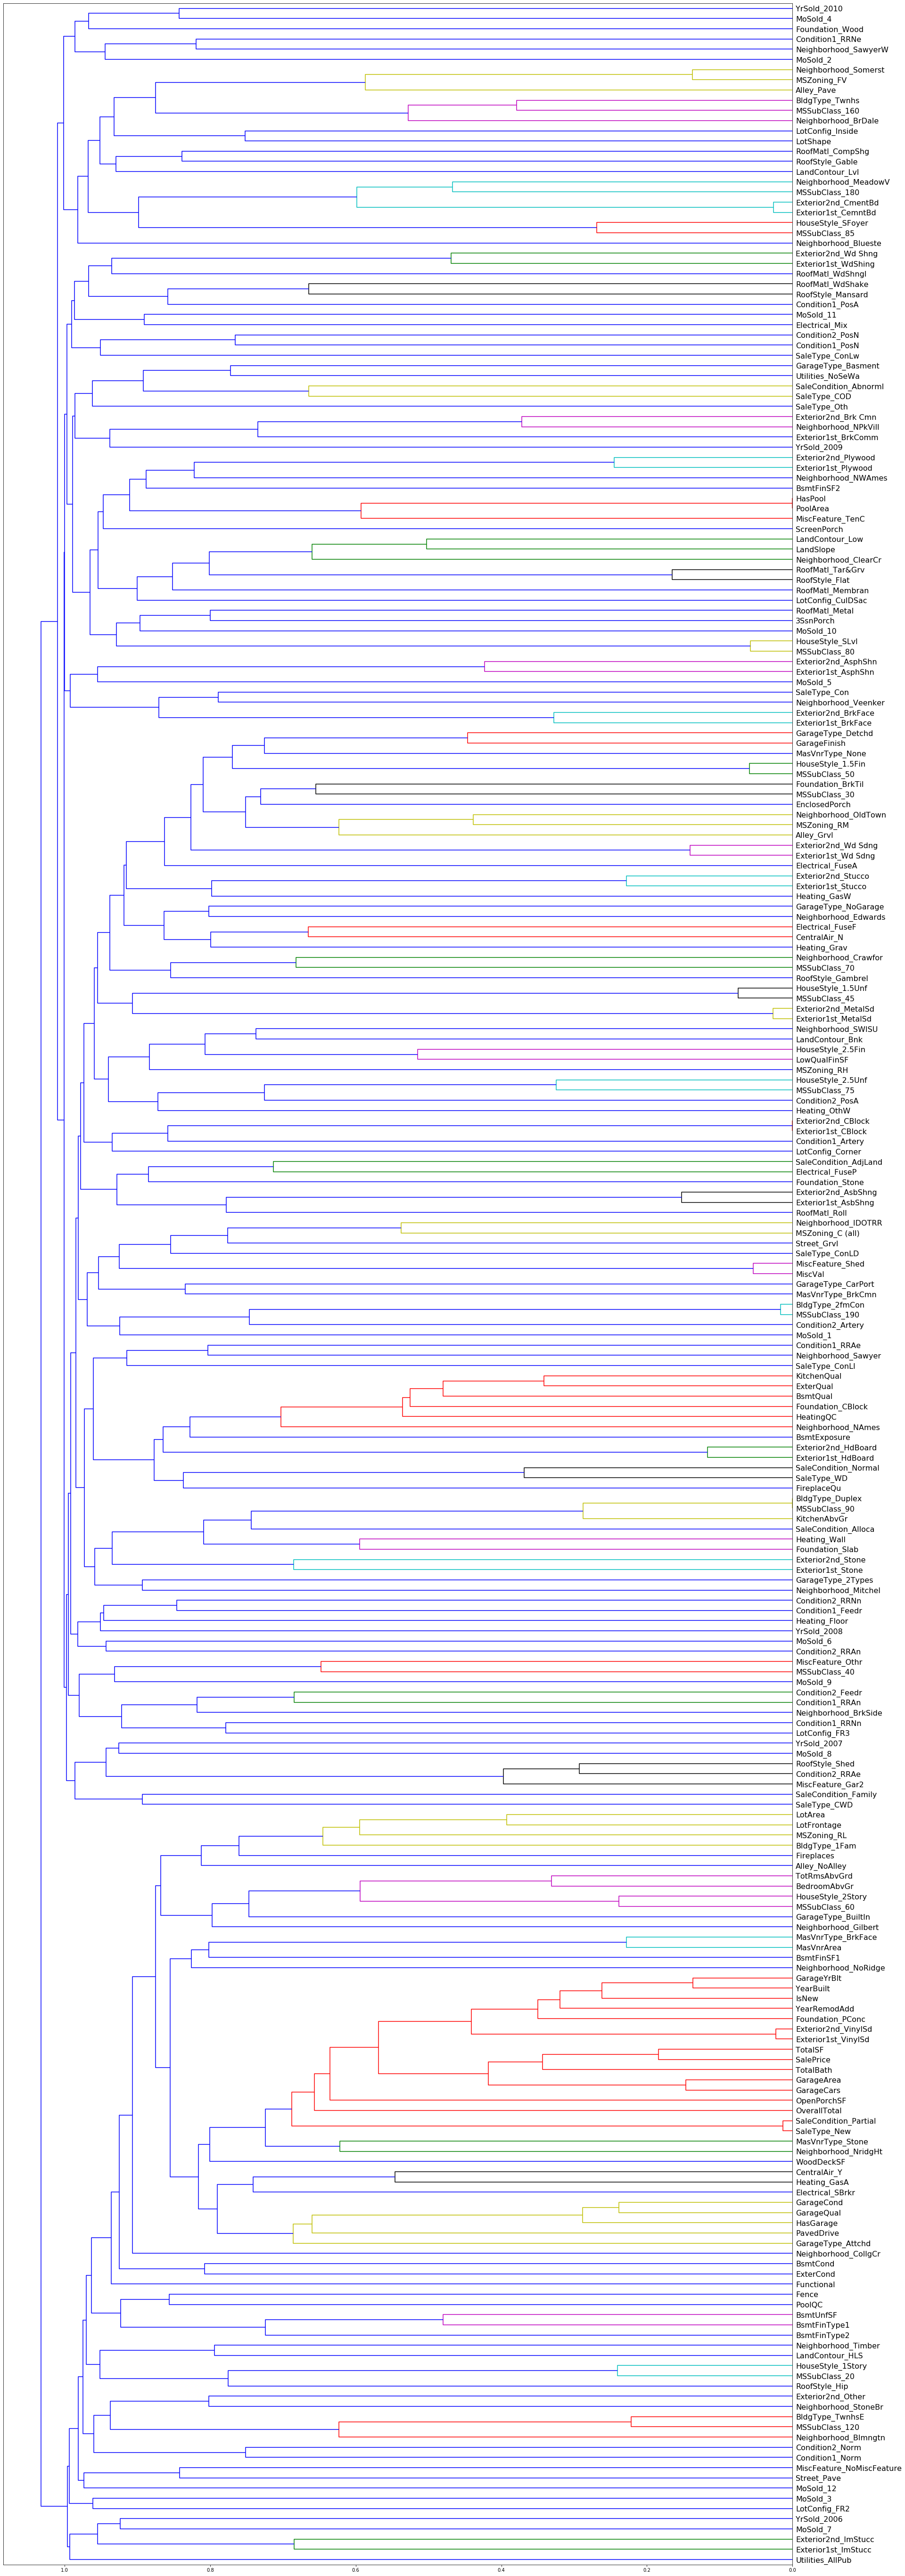

In [705]:
visualizeCorrelation(df_train)

The sooner two features collide into each other, the more correlated they are. Based on this, we can see five pairs of features that are highly correlated with each other. Some high correlated pairs are:
    1. GarageArea - GarageCars
    2. Exterior1st- Exterior2nd
    3. HouseStyle - MSSubClass
    4. BsmtFinType1 - BsmtFinType2
    5. GarageYrBlt - YearBuilt
    ....

In [706]:
df_train.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=251)

In [707]:
features_from_correlated_pairs = ['GarageArea', 'Exterior2nd', 'Exterior1st', 'MSSubClass', 'BsmtFinType1', 'BsmtFinSF1', 
                                 'KitchenQual', 'GarageCond', ' TotalBsmtSF', 'GarageYrBlt', 
                                 'TotRmsAbvGrd', 'BsmtQual', 'LotShape', 'LandSlope', 'FullBath']

df_train = dropFeaturesbyNames(df_train, features_from_correlated_pairs)

In [708]:
price_index = df_train.columns.get_loc('SalePrice')

X = df_train.drop(['SalePrice'], axis=1).values
y = df_train.iloc[:, price_index].values
X_train = X
y_train = y

In [709]:
# Fit Random Forest on Training Set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=400, random_state=0,
                          oob_score=True,  max_features=0.5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=True, random_state=0, verbose=0,
                      warm_start=False)

Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting, and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.

Later, we will be interested in importance of each future and relationships between them. Importance of each future will be presented as numerical value. To find out importances of features, Random forests can give us that information.

In [710]:
### Feature selection

def rf_feature_importance(rf, df):
    importance = rf.feature_importances_
    # create pandas dataframe with column name and its importance
    feature_importances = pd.DataFrame({'col_name': df.drop('SalePrice', axis=1).iloc[1:].columns, 'importance': importance})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
    return feature_importances

Let's find out importance (numerical value of it) of each of features.

In [711]:
importances = rf_feature_importance(rf, df_train)
importances.head(10)

,col_name,importance
37,TotalSF,0.424769
2,YearBuilt,0.123112
5,ExterQual,0.075288
35,OverallTotal,0.074796
36,TotalBath,0.054480
20,GarageCars,0.046122
1,LotArea,0.023925
3,YearRemodAdd,0.016144
17,Fireplaces,0.014081
11,BsmtUnfSF,0.011793


What columns are we going to drop? How to determine limit for dropping column?
Let's drop all rows with importance less than mean of importance.

In [712]:
#Let's take 25 most important features
importances = importances[:25]

In [713]:
print(f"We keep {(int)(importances.size/2)} features.")

We keep 25 features.


In [714]:
features_to_keep = importances.col_name
df_train_new = df_train[features_to_keep]
df_train_new.head()

,TotalSF,YearBuilt,ExterQual,OverallTotal,TotalBath,GarageCars,LotArea,YearRemodAdd,Fireplaces,BsmtUnfSF,...,OpenPorchSF,MSZoning_C (all),GarageQual,BedroomAbvGr,WoodDeckSF,GarageFinish,MSZoning_RM,BsmtExposure,FireplaceQu,ExterCond
0,7.850493,7.602900,1.098612,1.945910,1.504077,1.098612,9.042040,7.602900,0.000000,5.017280,...,4.127134,0.0,1.791759,1.386294,0.000000,1.098612,0.0,1.386294,1.386294,1.609438
1,7.833996,7.589336,1.386294,2.079442,1.252763,1.098612,9.169623,7.589336,0.693147,5.652489,...,0.000000,0.0,1.791759,1.386294,5.700444,1.098612,0.0,0.693147,1.791759,1.609438
2,7.903596,7.601902,1.098612,1.945910,1.504077,1.098612,9.328212,7.602401,0.693147,6.075346,...,3.761200,0.0,1.791759,1.386294,0.000000,1.098612,0.0,1.098612,1.791759,1.609438
3,7.813592,7.557995,1.386294,1.945910,1.098612,1.386294,9.164401,7.586296,0.693147,6.293419,...,3.583519,0.0,1.791759,1.386294,0.000000,1.386294,0.0,1.386294,1.098612,1.609438
4,8.114923,7.601402,1.098612,2.014903,1.504077,1.386294,9.565284,7.601402,0.693147,6.196444,...,4.442651,0.0,1.791759,1.609438,5.262690,1.098612,0.0,0.000000,1.791759,1.609438


In [715]:
X = df_train_new.values
y = df_train.iloc[:, price_index].values
X_train = X
y_train = y

In [716]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=True, random_state=0, verbose=0,
                      warm_start=False)

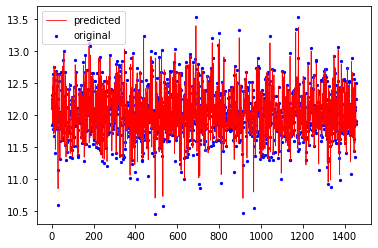

In [717]:
# Predict new result
X_test = X_train
y_test = y_train
y_pred = rf.predict(X_test)
# Plot y_test and y_pred to compare them
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

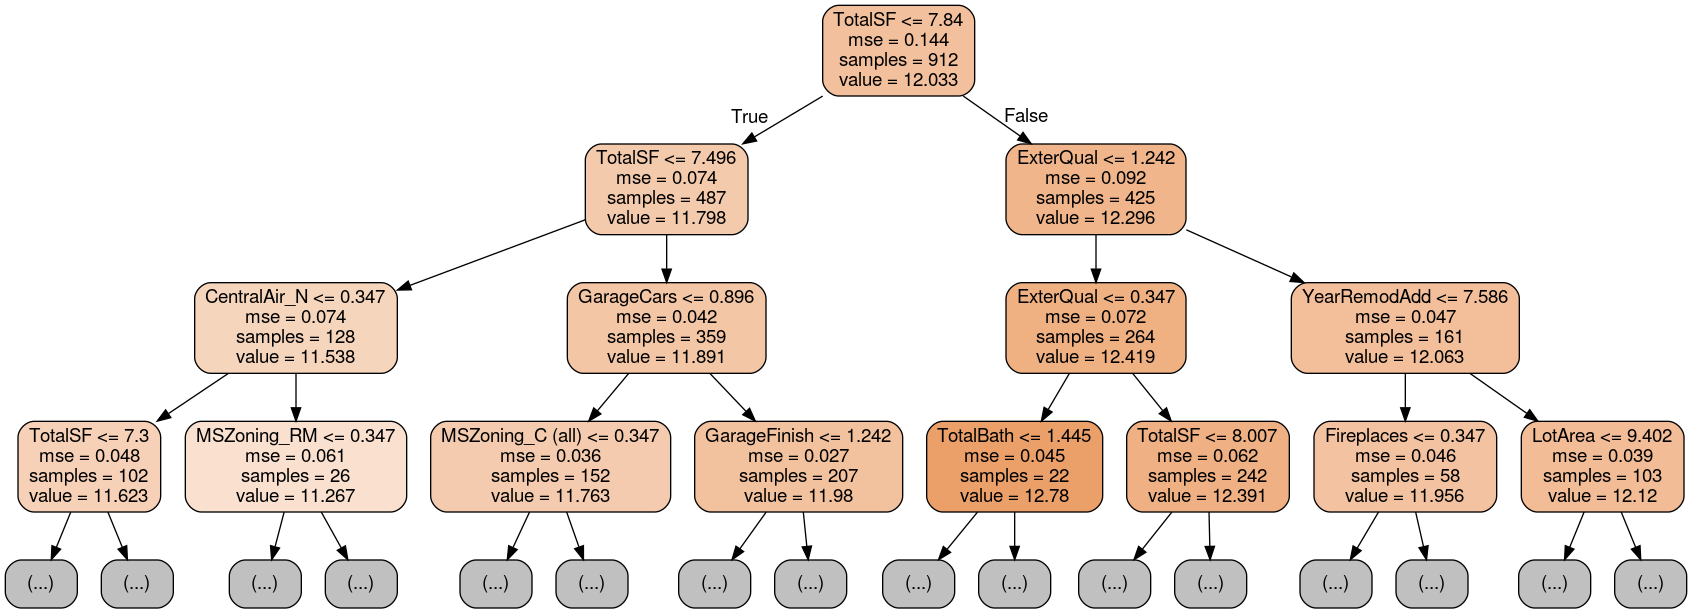

In [718]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

estimator = rf.estimators_[0]
#print(len(df_train_new.columns))
graph_dot = tree.export_graphviz(estimator, max_depth=3, out_file=None, feature_names=df_train_new[:3].columns.values, class_names='SalePrice', filled=True, rounded=True)
# Display in jupyter notebook
graph = pydotplus.graph_from_dot_data(graph_dot)
Image(graph.create_png())

In [719]:
rf.score(X_test, y_test)

0.9859828658233883

We assume Root MEan Square Error as measure of prediction of our model.

In [720]:
from sklearn import metrics

def get_rmse(y_test, y_pred):
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return rmse

In [721]:
rmse = get_rmse(y_pred, y_test)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.04730883850784156


In [722]:
##### Let's test our model on test dataset.

df_test_2 = pd.read_csv("data/test.csv");

df_test_2 = fixMissingValuesTest(df_test_2)
df_test_2 = fixWrongTypes(df_test_2)

df_test_2  = createNewFeatures(df_test_2)
df_test_2  = groupFeatures(df_test_2)
df_test_2  = numToCat(df_test_2)
df_test_2 = catToNum(df_test_2)
df_test_2 = fixSkewness(df_test_2)

df_test_2.head(5)

There are 236 skewed numerical features to log transform


,Id,LotFrontage,LotArea,LotShape,LandSlope,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,4.394449,9.360741,1.386294,0.0,7.581720,7.581720,0.000000,1.386294,1.609438,...,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0
1,1462,4.406719,9.565775,0.000000,0.0,7.580189,7.580189,4.691348,1.386294,1.609438,...,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0
2,1463,4.317488,9.534668,0.000000,0.0,7.599902,7.600402,0.000000,1.386294,1.609438,...,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0
3,1464,4.369448,9.208238,0.000000,0.0,7.600402,7.600402,3.044522,1.386294,1.609438,...,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0
4,1465,3.784190,8.518392,0.000000,0.0,7.597396,7.597396,0.000000,1.098612,1.609438,...,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0


In [723]:
df_test_2_new = df_test_2[features_to_keep]
y_test_pred = rf.predict(df_test_2_new.values)
df_test_2_new['Id'] = df_test_2['Id']
df_test_2_new['SalePrice'] = y_test_pred
df_test_2_new = deLog(df_test_2_new)

In [724]:
df_test_2_new.head(5)

,TotalSF,YearBuilt,ExterQual,OverallTotal,TotalBath,GarageCars,LotArea,YearRemodAdd,Fireplaces,BsmtUnfSF,...,GarageQual,BedroomAbvGr,WoodDeckSF,GarageFinish,MSZoning_RM,BsmtExposure,FireplaceQu,ExterCond,Id,SalePrice
0,1778.0,1961.0,3.0,5.5,1.0,1.0,11622.0,1961.0,0.0,270.0,...,4.0,2.0,140.0,3.0,0.0,3.0,3.0,4.0,1461,121875.516597
1,2658.0,1958.0,3.0,6.0,1.5,1.0,14267.0,1958.0,0.0,406.0,...,4.0,3.0,393.0,3.0,0.0,3.0,3.0,4.0,1462,159953.004559
2,2557.0,1997.0,3.0,5.0,2.5,2.0,13830.0,1998.0,1.0,137.0,...,4.0,3.0,212.0,0.0,0.0,3.0,5.0,4.0,1463,185656.183667
3,2530.0,1998.0,3.0,6.0,2.5,2.0,9978.0,1998.0,1.0,324.0,...,4.0,3.0,360.0,0.0,0.0,3.0,2.0,4.0,1464,187062.213770
4,2560.0,1992.0,2.0,6.5,2.0,2.0,5005.0,1992.0,0.0,1017.0,...,4.0,2.0,0.0,2.0,0.0,3.0,3.0,4.0,1465,188672.854775


In [725]:
df_test_2_new = df_test_2_new[['Id', 'SalePrice']]
df_test_2_new.head()

,Id,SalePrice
0,1461,121875.516597
1,1462,159953.004559
2,1463,185656.183667
3,1464,187062.213770
4,1465,188672.854775


In [726]:
df_test_2_new.to_csv(r'data/submission_rf.csv', index = False)